In [1]:
Fraud_check=pd.read_csv("Fraud_check.csv")
Fraud_check.head()

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [2]:
f = open("Problem_statement(Fraudcheck).txt", "r")
print(f.read())

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not




In [3]:
Fraud_check["Taxable_Income"]=np.where(Fraud_check["Taxable.Income"]<= 30000,"Risky","Good")
Fraud_check

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [4]:
Fraud_check.drop(columns=["Marital.Status","Taxable.Income"],inplace=True)

In [5]:
import sidetable
from termcolor import colored

In [6]:
print(colored("Information about data",attrs=['bold']))
print(Fraud_check.info())
print("\n")
print(colored("Missing Value ",attrs=['bold']))
print(Fraud_check.stb.missing())


Information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   City.Population  600 non-null    int64 
 2   Work.Experience  600 non-null    int64 
 3   Urban            600 non-null    object
 4   Taxable_Income   600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB
None


Missing Value 
                 Missing  Total  Percent
Undergrad              0    600      0.0
City.Population        0    600      0.0
Work.Experience        0    600      0.0
Urban                  0    600      0.0
Taxable_Income         0    600      0.0


we dont have any missing value here 

In [7]:
Fraud_check.stb.freq(['Taxable_Income'], style=True, cum_cols=False)
#imbalanced data  
# as of now we will proceed with imbalanced data and after first model building i will change it 

,Taxable_Income,Count,Percent
0,Good,476,79.33%
1,Risky,124,20.67%


In [8]:
Fraud_check.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [9]:
Q1=Fraud_check.quantile(.25)
Q3=Fraud_check.quantile(.75)
IQR=Q3-Q1
IQR

City.Population    83147.5
Work.Experience       16.0
dtype: float64

In [10]:
class outlier():
    
    def min_outlier(self,Q1,IQR):
        outlier_value=Q1-(1.5*IQR)
        return outlier_value  
    def max_outlier(self,Q3,IQR):
        outlier_value=Q3+(1.5*IQR)
        return outlier_value  
outlier=outlier()

In [11]:
print("City.Population Min Outlier{}" .format(outlier.min_outlier(66966.75,83147.5)))
print("City.Population Max Outlier{}" .format(outlier.max_outlier(150114.25,83147.5)))
print("Work.Experience Min Outlier{}" .format(outlier.min_outlier(8,16)))
print("Work.Experience Max Outlier{}" .format(outlier.max_outlier(24,16)))

City.Population Min Outlier-57754.5
City.Population Max Outlier274835.5
Work.Experience Min Outlier-16.0
Work.Experience Max Outlier48.0


In [12]:
Fraud_check[(Fraud_check["City.Population"]<-57754.5) |(Fraud_check["City.Population"]>274835.5)|(Fraud_check["Work.Experience"]<-16)|(Fraud_check["Work.Experience"]>48)]

,Undergrad,City.Population,Work.Experience,Urban,Taxable_Income


We dont have any outlier

In [13]:
print(colored("Mean",attrs=["bold"]))
print(Fraud_check.mean().round(2))
print("\n")
print(colored("Median",attrs=["bold"]))
print(Fraud_check.median().round(2))
print("\n")
print(colored("Mode",attrs=["bold"]))
print(Fraud_check.mode().round(2))
print("\n")
print(colored("Variance",attrs=["bold"]))
print(Fraud_check.var().round(2))
print("\n")
print(colored("SD",attrs=["bold"]))
print(Fraud_check.std().round(2))
print("\n")
print(colored("Skew",attrs=["bold"]))
print(Fraud_check.skew().round(2))
print("\n")
print(colored("Kurtosis",attrs=["bold"]))
print(Fraud_check.kurt().round(2))


Mean
City.Population    108747.37
Work.Experience        15.56
dtype: float64


Median
City.Population    106493.5
Work.Experience        15.0
dtype: float64


Mode
  Undergrad  City.Population  Work.Experience Urban Taxable_Income
0       YES            57194             10.0   YES           Good
1       NaN           162777              NaN   NaN            NaN


Variance
City.Population    2.485030e+09
Work.Experience    7.818000e+01
dtype: float64


SD
City.Population    49850.08
Work.Experience        8.84
dtype: float64


Skew
City.Population    0.13
Work.Experience    0.02
dtype: float64


Kurtosis
City.Population   -1.12
Work.Experience   -1.17
dtype: float64


# Visualization

In [14]:
#ND
Fraud_check.columns

Index(['Undergrad', 'City.Population', 'Work.Experience', 'Urban',
       'Taxable_Income'],
      dtype='object')

C:\Users\Sanchi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>



stats=0.9534081816673279, p=7.859946417679287e-13


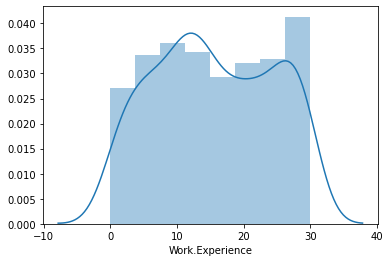

In [15]:
sns.distplot(Fraud_check["Work.Experience"])
print("\n")
import scipy
stat, p=scipy.stats.shapiro(Fraud_check["Work.Experience"])
print("stats={}, p={}".format(stat,p))
# Null Rejected data is not normal distributed bcz p is less than 0.05

<IPython.core.display.Javascript object>



stats=0.9579437375068665, p=4.558839417079241e-12


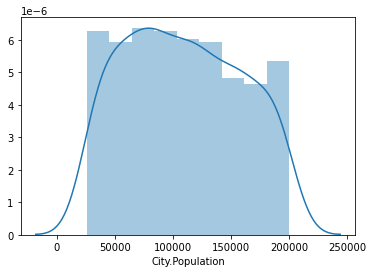

In [16]:
sns.distplot(Fraud_check["City.Population"])
print("\n")

stat, p=scipy.stats.shapiro(Fraud_check["City.Population"])
print("stats={}, p={}".format(stat,p))
# Null Rejected data is not normal distributed bcz p is less than 0.05

<IPython.core.display.Javascript object>

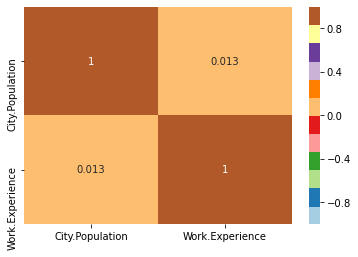

In [17]:
sns.heatmap(Fraud_check.corr(),vmin=-1, vmax=1, cmap='Paired',annot=True)

# Model Building

In [18]:
from sklearn.model_selection import cross_val_score, GridSearchCV,cross_val_predict,cross_validate
from sklearn.tree import DecisionTreeClassifier

In [19]:
x=Fraud_check.drop(columns="Taxable_Income")
x["Undergrad"]=np.where(x["Undergrad"]=="yes",1,0)
x["Urban"]=np.where(x["Urban"]=="yes",1,0)
x

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Undergrad,City.Population,Work.Experience,Urban
0,0,50047,10,0
1,0,134075,18,0
2,0,160205,30,0
3,0,193264,15,0
4,0,27533,28,0
...,...,...,...,...
595,0,39492,7,0
596,0,55369,2,0
597,0,154058,0,0
598,0,180083,17,0


In [20]:
y=Fraud_check[["Taxable_Income"]]

y

,Taxable_Income
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [59]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=3)
model1

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3)

In [60]:
model1=model1.fit(x,y)

In [61]:
from sklearn.model_selection import cross_val_score, GridSearchCV,cross_val_predict,cross_validate

In [62]:
score1=cross_val_score(model1,x,y,cv=8).round(2)
score1.mean().round(2)

0.79

In [63]:
actual=pd.Series(y.Taxable_Income)
actual

<IPython.core.display.Javascript object>

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_Income, Length: 600, dtype: object

In [64]:
predict=pd.Series(model1.predict(x))
predict

<IPython.core.display.Javascript object>

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Length: 600, dtype: object

In [129]:
pd.crosstab(actual, predict)

<IPython.core.display.Javascript object>

col_0,Good,Risky
Taxable_Income,,
Good,472,4
Risky,117,7


In [130]:
from sklearn import metrics

In [131]:
print("Accuracy:",metrics.accuracy_score(actual, predict).round(2))

Accuracy: 0.8


In [132]:
from sklearn import tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

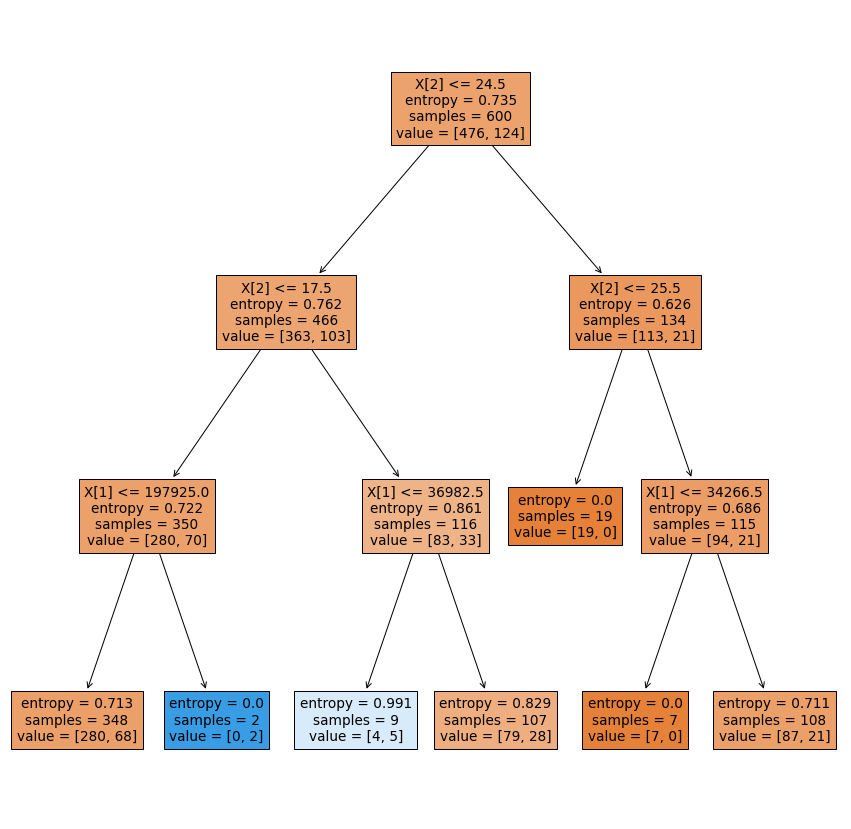

In [133]:
plt.figure(figsize=(15,15))
tree.plot_tree(model1,filled=True) 
plt.show()

# Model Building with Grid Search

In [100]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1, 2,3,4]}
gridsearch=GridSearchCV(DecisionTreeClassifier, parameters)


In [256]:
gridsearch=GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid={
            'criterion': ('gini', 'entropy'),
            'max_depth': [1, 2,3,4,5,6,7,20,None],
            'min_samples_split':[1, 2,3,4,5,6,7],
            'min_samples_leaf':[1,2,3,4],
            },
        cv=10, verbose=0,n_jobs=-1)

In [257]:
grid_result=gridsearch.fit(x, y)

In [258]:
best_params = grid_result.best_params_
best_params

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [266]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=3,min_samples_split=2,min_samples_leaf=1,max_features="auto",class_weight='balanced')
model2

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_features='auto', random_state=3)

In [267]:
model2=model2.fit(x,y)

In [277]:
score2=cross_val_score(model2,x,y,cv=8).round(2)
score2.mean().round(2)

0.65

In [278]:
predict2=pd.Series(model2.predict(x))



<IPython.core.display.Javascript object>

In [279]:
actual2=pd.Series(y.Taxable_Income)

<IPython.core.display.Javascript object>

In [280]:
pd.crosstab(actual2,predict2)

<IPython.core.display.Javascript object>

col_0,Good,Risky
Taxable_Income,,
Good,462,14
Risky,0,124


In [272]:
print("Accuracy:",metrics.accuracy_score(actual2, predict2).round(2))

Accuracy: 0.98


In [281]:
model2.feature_importances_

array([0.        , 0.86595536, 0.13404464, 0.        ])

In [282]:
df_feature_importances = pd.DataFrame({'feature': list(x.columns), 
                                       'importance': list(model2.feature_importances_)})
df_feature_importances.sort_values(by='importance', inplace=True)
df_feature_importances.set_index('feature', drop=True, inplace=True)
df_feature_importances

<IPython.core.display.Javascript object>

,importance
feature,
Undergrad,0.000000
Urban,0.000000
Work.Experience,0.134045
City.Population,0.865955


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

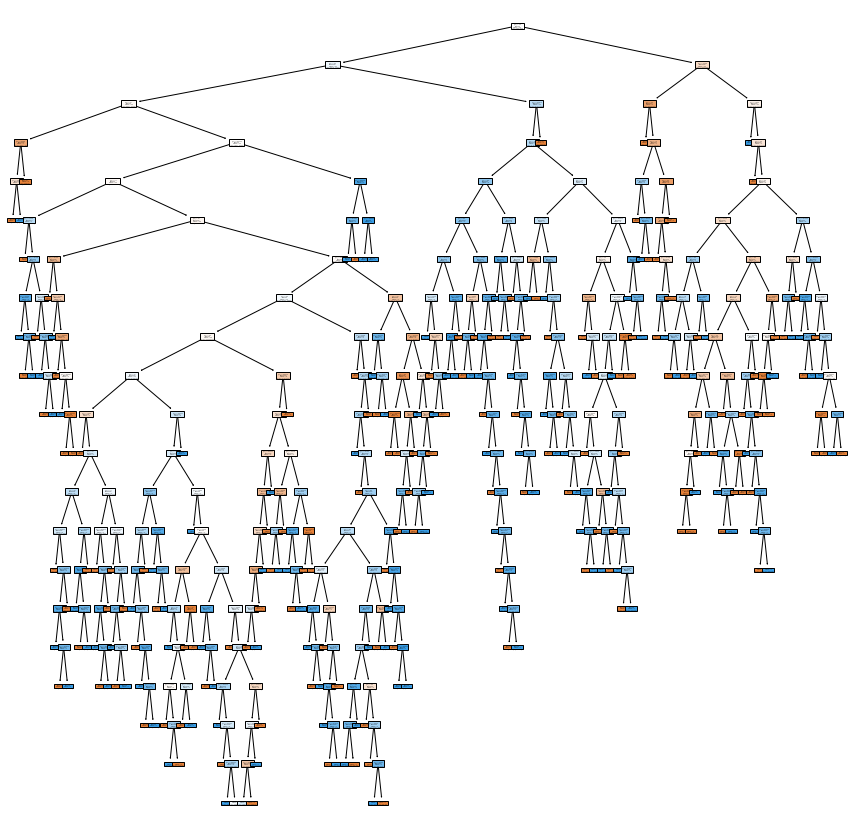

In [283]:
plt.figure(figsize=(15,15))
tree.plot_tree(model2,filled=True) 
plt.show()

In [ ]:
# so first we have to change imbalanced data then we can work 